# Analyze data

## Import and merge data

In [1]:
import pandas as pd

In [2]:
# Metadata from Citations
metadata_raw = pd.read_csv("../data/raw/literature_review_meta_data.csv")

In [3]:
metadata_columns_include = ["Item Type", "Publication Year", "Author", "Title", "Publication Title",
                            "Conference Name"]

In [4]:
metadata = metadata_raw[metadata_columns_include]

In [5]:
metadata

,Item Type,Publication Year,Author,Title,Publication Title,Conference Name
0,journalArticle,2017,"Revilla, Melanie; Toninelli, Daniele; Ochoa, C...",An experiment comparing grids and item-by-item...,Telematics & Informatics,NaN
1,journalArticle,2019,"Bosch, Oriol J.; Revilla, Melanie; Paura, Ezeq...",Answering Mobile Surveys With Images: An Explo...,Social Science Computer Review,NaN
2,journalArticle,2019,"Ha, Louisa,; Zhang, Chenjie",Are computers better than smartphones for web ...,Online Information Review,NaN
3,journalArticle,2015,"Buskirk, Trent D.",Are sliders too slick for surveys? An experime...,"methods, data, analyses",NaN
4,journalArticle,2017,"Revilla, Melanie",Are There Differences Depending on the Device ...,Field methods,NaN
...,...,...,...,...,...,...
81,journalArticle,2019,"Grady, Rebecca H.; Greenspan, Rachel L.; Liu, ...",What Is the Best Size for Matrix-Style Questio...,Social Science Computer Review,NaN
82,journalArticle,2015,"Wells, Tom",What market researchers should know about mobi...,International Journal of Market Research,NaN
83,journalArticle,2015,"Steinbrecher, Markus; Roßmann, Joss; Blumensti...",Why Do Respondents Break Off Web Surveys and D...,International Journal of Public Opinion Research,NaN
84,journalArticle,2017,"Couper, Mick P.; Peterson, Gregg J.",Why Do Web Surveys Take Longer on Smartphones?,Social Science Computer Review,NaN


In [6]:
column_name = ['article_genre', 'article_year', 'article_author', 'article_name', 'article_journal', 
               'article_proceeding']

In [7]:
metadata.columns = column_name

In [8]:
# Coding results from literaturef
data_raw = pd.read_excel("../data/raw/literature_coding_results.xlsx")

In [9]:
# Merge data
data = pd.merge(metadata, data_raw, how = "left", on='article_name')

In [10]:
data

,article_genre,article_year,article_author,article_name,article_journal,article_proceeding,article_topic,article_type,survey_data,survey_country,...,mobile_design_emoji_request_decreases_completion_time,mobile_design_emoji_request_less_complex_survey,mobile_construct_validity,invitation_mode_rdd_sms_response_rate_low,mobile_participants_representative_not,mobile_participants_income_lower,mobile_participants_education_lower,mobile_scale_effects_more,mobile_design_measurement_invariance_decremental_scale,mobile_design_measurement_invariance_incremental_scale
0,journalArticle,2017,"Revilla, Melanie; Toninelli, Daniele; Ochoa, C...",An experiment comparing grids and item-by-item...,Telematics & Informatics,NaN,Survey Design,Research Article,1.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,journalArticle,2019,"Bosch, Oriol J.; Revilla, Melanie; Paura, Ezeq...",Answering Mobile Surveys With Images: An Explo...,Social Science Computer Review,NaN,Alternative Input,Research Article,1.0,"['Spain', 'Mexico']",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,journalArticle,2019,"Ha, Louisa,; Zhang, Chenjie",Are computers better than smartphones for web ...,Online Information Review,NaN,Data Quality,Research Article,1.0,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,journalArticle,2015,"Buskirk, Trent D.",Are sliders too slick for surveys? An experime...,"methods, data, analyses",NaN,Survey Design,Research Article,1.0,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,journalArticle,2017,"Revilla, Melanie",Are There Differences Depending on the Device ...,Field methods,NaN,Survey Design,Research Article,1.0,Spain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,journalArticle,2019,"Grady, Rebecca H.; Greenspan, Rachel L.; Liu, ...",What Is the Best Size for Matrix-Style Questio...,Social Science Computer Review,NaN,Survey Design,Research Article,1.0,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,journalArticle,2015,"Wells, Tom",What market researchers should know about mobi...,International Journal of Market Research,NaN,General Development,Review,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,journalArticle,2015,"Steinbrecher, Markus; Roßmann, Joss; Blumensti...",Why Do Respondents Break Off Web Surveys and D...,International Journal of Public Opinion Research,NaN,Data Quality,Research Article,1.0,Germany,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,journalArticle,2017,"Couper, Mick P.; Peterson, Gregg J.",Why Do Web Surveys Take Longer on Smartphones?,Social Science Computer Review,NaN,Data Quality,"['Review', 'Research Article']",1.0,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analyze metadata

### Type of Article

In [11]:
data.groupby("article_genre").size()

article_genre
conferencePaper     2
journalArticle     84
dtype: int64

In [12]:
data.groupby("survey_data").size()

survey_data
0.0     7
1.0    74
dtype: int64

### Graphic Survey per Year

In [16]:
data_survey_year = data[data.survey_year.notna()]

In [17]:
7/73

0.0958904109589041

In [18]:
data_survey_year.groupby("survey_year").size()

survey_year
2005.0     1
2007.0     1
2010.0     1
2011.0     3
2012.0     6
2013.0     8
2014.0     7
2015.0    11
2016.0     8
2017.0     9
2018.0     6
2019.0     1
dtype: int64

In [19]:
data_survey_year.survey_year.mean()

2014.5483870967741

In [20]:
data_survey_year.groupby("article_year").size()

article_year
2009     1
2010     1
2013     3
2014     6
2015     5
2016     4
2017     6
2018     8
2019    13
2020     7
2021     8
dtype: int64

In [21]:
data_survey_year["article_year"].mean()

2017.4516129032259

In [22]:
data_survey_year["article_year"].mean()-data_survey_year.survey_year.mean()

2.903225806451701

### Overview of Journal

In [23]:
data.groupby("article_name").size().sort_values(ascending=False)

article_name
An experiment comparing grids and item-by-item formats in web surveys completed through PCs and smartphones.                         1
Optimal Data Entry Designs in Mobile Web Surveys for Older Adults                                                                    1
Slider Bars in Multi-Device Web Surveys                                                                                              1
Simultaneous estimation of multiple sources of error in a smartphone-based survey                                                    1
Shorter interviews, longer surveys Optimising the survey participant experience while accommodating ever expanding client demands    1
                                                                                                                                    ..
Experimentation for developing evidence-based ui standards of mobile survey questionnaires                                           1
Experimental comparison of PC web, smartph

### Overview of authors

In [24]:
authors = pd.DataFrame({"author":[j for i in metadata["article_author"].str.split("; ") for j in i]})
publication_per_author = authors.groupby("author").size().sort_values(ascending = False)
print(publication_per_author.head(25))

author
Couper, Mick P.        15
Revilla, Melanie       14
Toepoel, Vera           8
Lugtig, Peter           7
Mavletova, Aigul        6
Antoun, Christopher     6
Bosch, Oriol J.         5
De Bruijne, Marika      3
Ochoa, Carlos           3
Keusch, Florian         3
Wang, Lin               3
Buskirk, Trent D.       3
Schlosser, Stephan      3
Toninelli, Daniele      3
Höhne, Jan K.           3
Wijnant, Arnaud         3
Roßmann, Joss           3
Yan, Ting               3
Gummer, Tobias          2
Ha, Louisa,             2
Katz, Jonathan          2
Haan, Marieke           2
Paura, Ezequiel         2
Figueroa, Ivonne J.     2
Falcone, Brian          2
dtype: int64


### Overview of Countries

In [25]:
data.groupby("survey_country").size().sort_values(ascending=False)

survey_country
USA                                              20
Germany                                          14
Netherlands                                      11
Spain                                             9
Russia                                            5
UK                                                2
['Spain', 'Mexico']                               2
European Union Member and Accession Countries     1
Italy                                             1
Norway                                            1
Norwegia                                          1
South Korea                                       1
Spanish Speaking Countries                        1
['China', 'USA']                                  1
['UK', 'Australia', 'Canda']                      1
dtype: int64

In [26]:
countries = data.survey_country.values.tolist()

In [27]:
# We add countries that are part of multiple countries surveys
countries_to_add = ["China", "USA", "Spain", "Mexico","Spain", "Mexico", "UK", "Australia", "Canada", "Norway"]
countries_to_drop = ["European Union Member and Accession Countries","['China', 'USA']", "['Spain', 'Mexico']",
                     "['UK', 'Australia', 'Canda']", "Spanish Speaking Countries", "Norwegia"]  

In [28]:
countries_complete = countries + countries_to_add 

In [29]:
countries_for_count = [country for country in countries_complete if country not in countries_to_drop]

In [30]:
country_count = pd.DataFrame({"Country":countries_for_count}).groupby("Country").size()
country_count_df = country_count.reset_index().rename(columns = {0: "Count"})

In [31]:
country_count_df.replace({"USA": "United States of America",
                          "UK": " United Kingdom"}, inplace = True)

In [32]:
import geopandas as gpd
import folium
from matplotlib import cm
import numpy as np

In [33]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [34]:
mapped = world.merge(country_count_df, how="left", left_on=['name'], right_on=['Country'])
mapped.fillna(0, inplace = True)

In [35]:
cmap = cm.get_cmap("OrRd")
cmap.set_under(color = 'lightgrey')

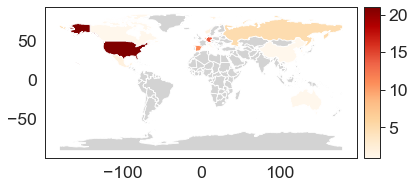

In [36]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

plot_world = mapped.plot(column='Count',ax=ax, legend=True, cax=cax, cmap=cmap, vmin= 1)
plot_world.figure.savefig('../reports/figures/surveys_per_country.png')

### Survey Operator

In [37]:
data.groupby("survey_operator").size().sort_values(ascending = False)

survey_operator
Author                                                                                                                                 14
Netquest                                                                                                                               12
CentERdata                                                                                                                              8
Online Market Intelligence                                                                                                              5
KnowledgePanel                                                                                                                          3
GESIS                                                                                                                                   3
German Longitudinal Election Study                                                                                                      3
SurveyMonkey Audie

### Research Topics

In [38]:
import re

In [39]:
def get_results(df, columns):
    interesting_columns = ["survey_year","survey_participants_number",
                           "survey_country", "survey_operator",
                           "survey_population","survey_design_mobile_adapted", ]
    df_columns = df[interesting_columns + columns]
    df_of_interest = df_columns[df_columns[alternative_input].notna().any(axis = 1)]
    return df_of_interest

In [40]:
survey_quality_indicator = [x for x in data.columns.tolist() if re.match("mobile_(?!participant|design).*", x)] 
data["article_topic_survey_quality"] = data[survey_quality_indicator].notna().any(axis = 1)
data["article_topic_survey_quality"].sum()

48

In [41]:
mobile_participants_indicator = [x for x in data.columns.tolist() if re.match("mobile_participant.*", x)] 
data["article_topic_mobile_participants"] = data[mobile_participants_indicator].notna().any(axis = 1)
data["article_topic_mobile_participants"].sum()

22

In [42]:
mobile_design_indicator = [x for x in data.columns.tolist() if re.match("mobile_design.*", x)] 
data["article_topic_mobile_design"] = data[mobile_design_indicator].notna().any(axis = 1)
data["article_topic_mobile_design"].sum()

28

In [43]:
alternative_input_indicator = [x for x in data.columns.tolist() if re.match("input_alternative.*", x)] 
data["article_topic_alternative_input"] = data[alternative_input_indicator].notna().any(axis = 1)
data["article_topic_alternative_input"].sum()

6

In [44]:
online_participants_indicator = [x for x in data.columns.tolist() if re.match("online_participant.*", x)] 
data["article_topic_online_participants"] = data[online_participants_indicator].notna().any(axis = 1)
data["article_topic_online_participants"].sum()

9

In [45]:
invitation_mode_indicator = [x for x in data.columns.tolist() if re.match("invitation_mode.*", x)] 
data["article_topic_invitation_mode"] = data[invitation_mode_indicator].notna().any(axis = 1)
data["article_topic_invitation_mode"].sum()

7

In [46]:
review_indicator = [x for x in data.columns.tolist() if re.match("review_.*", x)] 
data["article_topic_review"] = data[review_indicator].notna().any(axis = 1)
data["article_topic_review"].sum()

7

### Graphic Publication per Year

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
topic_dic = {"Survey Quality": "article_topic_survey_quality",
             "Mobile Participants": "article_topic_mobile_participants",
             "Mobile Design": "article_topic_mobile_design",
             "Input Alternative": "article_topic_alternative_input",
             "Online Participants": "article_topic_online_participants",
             "Invitation Mode": "article_topic_invitation_mode",
             "Review": "article_topic_review"}

In [113]:
def create_visualisation_data(data, topic_dic):
    def transform_into_vec(data, topic, name):
        relevant_data = data[["article_year", topic]][data[topic]]
        relevant_data["Topic"] = name
        return relevant_data.drop(topic, axis = 1)
    topic_df_list = []
    for key in topic_dic:
        topic_df_list.append(transform_into_vec(data, topic_dic[key], key))
    all_articles = data[["article_year"]]
    all_articles["Topic"] = "All Publications"
    topic_df_list.append(all_articles)
    result = pd.concat(topic_df_list).rename(columns = {"article_year": "Year"})
    return result

In [120]:
# Prepare dataset
category_per_year = create_visualisation_data(data, topic_dic)
visualization_year_category = category_per_year.sort_values("Topic").reset_index(drop = True).dropna()

/var/folders/zx/r0fw_tq95g13lvmt5x8bp_vr0000gn/T/ipykernel_39120/249209027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_articles["Topic"] = "All Publications"


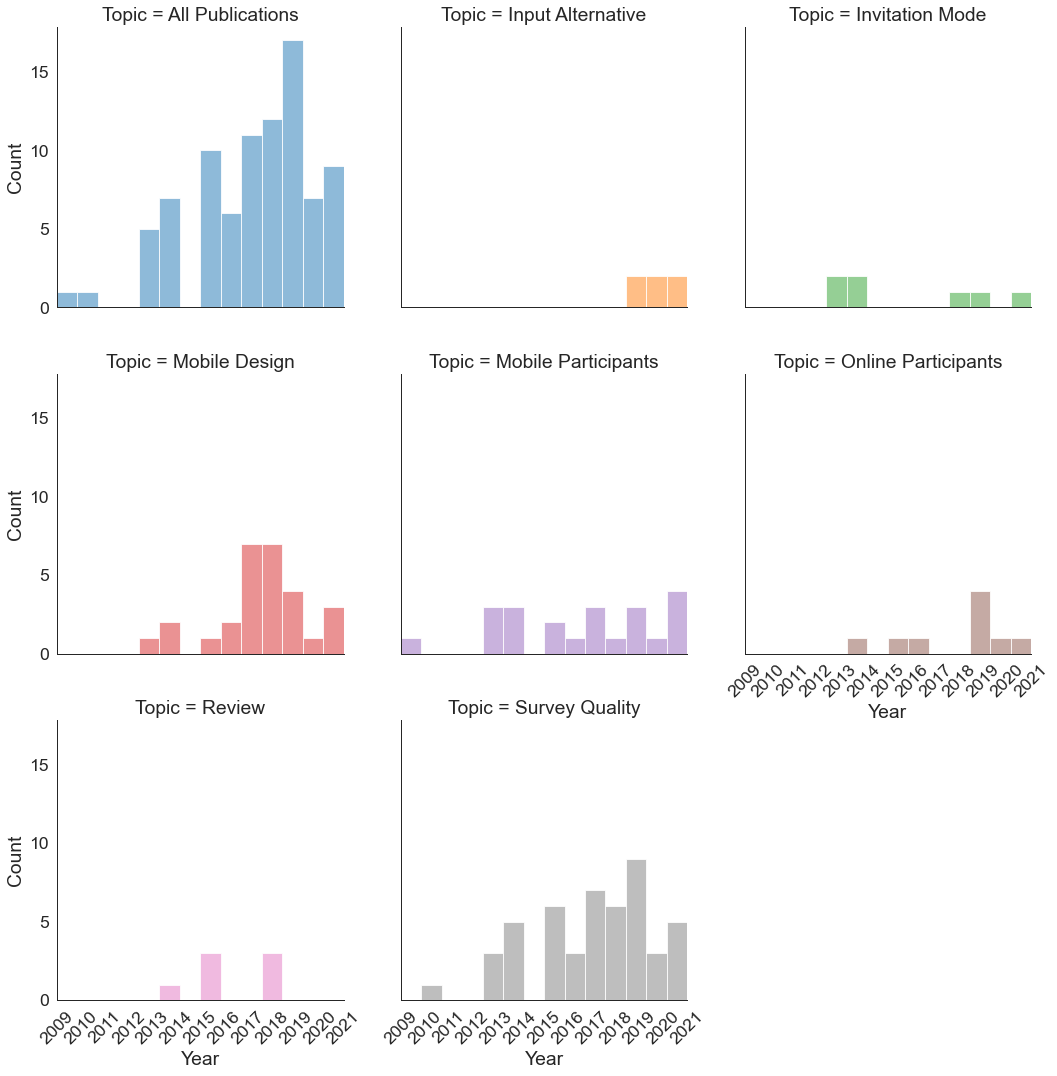

In [157]:
sns.set_style('white')
sns.set_context('paper', font_scale = 2)
plot = sns.displot(data=visualization_year_category, x= "Year",bins = 14,
            hue="Topic", col = "Topic", col_wrap=3,legend = False, 
           )
plt.subplots_adjust(wspace=0.2)
plot.set_xticklabels(rotation=45)
plot.set(xlim=(2009,2021),
         xticks= (range(2009,2022)),
         xticklabels=(range(2009,2022)))
plot.savefig('../reports/figures/publications_per_year_per_categories.png')

### Data Quality

In [47]:
def create_data_set(df, topic):
    interesting_columns = ["survey_year","survey_participants_number",
                           "survey_country", "survey_operator",
                           "survey_population","survey_design_mobile_adapted", ]
    interesting_columns.append(topic)
    df_columns = df[interesting_columns]
    df_of_interest = df_columns[df_columns[topic].notna()]
    write_location = "../data/processed/" + topic + ".xlsx"
    df_of_interest.to_excel(write_location, index=False)
    return df_of_interest

In [48]:
columns = data.columns.tolist()
columns.sort()
columns

['article_author',
 'article_genre',
 'article_journal',
 'article_name',
 'article_proceeding',
 'article_topic',
 'article_topic_alternative_input',
 'article_topic_invitation_mode',
 'article_topic_mobile_design',
 'article_topic_mobile_participants',
 'article_topic_online_participants',
 'article_topic_review',
 'article_topic_survey_quality',
 'article_type',
 'article_year',
 'input_alternative_android_voice_higher_nonreponse_than_text',
 'input_alternative_android_voice_less_valid_answers_than_text',
 'input_alternative_android_voice_more_characters_than_text',
 'input_alternative_android_voice_more_complicated_than_text',
 'input_alternative_android_voice_more_techical_problems_than_text',
 'input_alternative_android_voice_trust_anonymity_less_than_text',
 'input_alternative_image_taking_lower_compliance_than_image_uploading',
 'input_alternative_ios_voice_higher_nonreponse_than_text',
 'input_alternative_ios_voice_less_characters_than_text',
 'input_alternative_ios_voice_less

#### Analyse Quality Dimensions

In [49]:
quality_indicator = [x for x in data.columns.tolist() if re.match("mobile_(?!participant|design).*", x)] 
quality_indicator.sort()

In [50]:
data[quality_indicator].count().sort_values(ascending = False).head(10)

mobile_completion_time_higher         28
mobile_breakoff_rate_higher           15
mobile_missing_items_rate_higher      11
mobile_text_answer_shorter            11
mobile_text_answer_avoid_more          9
mobile_straightlining_more             6
mobile_non_substantial_anwser_more     5
mobile_primacy_effect_higher           4
mobile_satisfaction_lower              4
mobile_completion_rate_lower           4
dtype: int64

#### Analyze Completion Time

In [51]:
completion_time = create_data_set(data, "mobile_completion_time_higher")

In [52]:
def analyse_dimension(data, topic):
    print("Summary of the hypothesis decisions")
    print(data.groupby(topic).size())
    print("\n")
    print("Summary of the influence of the survey country")
    print(pd.crosstab(data['survey_country'],data[topic],margins = False))
    print("\n")
    print("Summary of the influence of the survey operator")
    print(pd.crosstab(data['survey_operator'],data[topic],margins = False))
    print("\n")
    print("Summary of the influence of the survey year")
    print(pd.crosstab(data['survey_year'],data[topic],margins = False))
    print("\n")
    print("Summary of the influence of an design adapted for mobile devices")
    print(pd.crosstab(data['survey_design_mobile_adapted'],data[topic],margins = False))
    print("\n")
    print("Summary of the influence of the survey population")
    print(pd.crosstab(data['survey_population'],data[topic],margins = False))
    print("\n")

### Survey Participants

In [53]:
participants_indicator = [x for x in data.columns.tolist() if re.match("mobile_participants_.*", x)] 
participants_indicator.sort()
data[participants_indicator].count().sort_values(ascending = False).head(60)

mobile_participants_younger                                          11
mobile_participants_more_female                                      10
mobile_participants_education_higher                                  6
mobile_participants_more_mobile                                       5
mobile_participants_income_higher                                     3
mobile_participants_less_alone                                        3
mobile_participants_more_male                                         2
mobile_participants_more_urban                                        2
mobile_participants_more_multitasking                                 2
mobile_participants_coverage_bias                                     2
mobile_participants_less_trust_in_confidentiality                     2
mobile_participants_social_class_higher                               1
mobile_participants_sensitivity_perceived_higher                      1
mobile_participants_representative_not                          

In [54]:
participants_indicator

['mobile_participants_coverage_bias',
 'mobile_participants_coverage_bias_weighting_elimated',
 'mobile_participants_education_higher',
 'mobile_participants_education_lower',
 'mobile_participants_income_higher',
 'mobile_participants_income_lower',
 'mobile_participants_less_alone',
 'mobile_participants_less_trust_in_confidentiality',
 'mobile_participants_millenial_willing_to_use_emoji',
 'mobile_participants_millenials_participate_more_mobile',
 'mobile_participants_more_distracted',
 'mobile_participants_more_female',
 'mobile_participants_more_male',
 'mobile_participants_more_mobile',
 'mobile_participants_more_moving',
 'mobile_participants_more_multitasking',
 'mobile_participants_more_progressive',
 'mobile_participants_more_stranger_present',
 'mobile_participants_more_urban',
 'mobile_participants_more_willing_passive_data_collection',
 'mobile_participants_multiple_browser_sessions_more',
 'mobile_participants_positive_asylum_decision_higher_participation',
 'mobile_parti

### Online Participants

In [55]:
online_participants_indicator = [x for x in data.columns.tolist() if re.match("online_participants_.*", x)]
online_participants_indicator.sort()

In [56]:
data[online_participants_indicator].count().sort_values(ascending = False)

online_participants_young_use_mobile_more                            3
online_participants_mobile_increasing                                2
online_participants_female_use_mobile_more                           1
online_participants_male_more_ios_than_female                        1
online_participants_not_accepting_mobile_survey_older                1
online_participants_more_urban_use_mobile_more                       1
online_participants_more_educated_use_smartphone_more                1
online_participants_male_more_mobile_than_female                     1
online_participants_male_more_android_than_female                    1
online_participants_female_willingness_use_mobile_higher             1
online_participants_lower_income_use_mobile_more                     1
online_participants_insights                                         1
online_participants_increasing_usage_of_smartphone                   1
online_participants_higher_income_willingness_use_mobile_higher      1
online

In [57]:
online_participants_indicator

['online_participants_female_use_mobile_more',
 'online_participants_female_willingness_use_mobile_higher',
 'online_participants_higher_educated_willingness_use_mobile_higher',
 'online_participants_higher_education_use_mobile_more',
 'online_participants_higher_income_willingness_use_mobile_higher',
 'online_participants_increasing_usage_of_smartphone',
 'online_participants_insights',
 'online_participants_lower_income_use_mobile_more',
 'online_participants_male_more_android_than_female',
 'online_participants_male_more_ios_than_female',
 'online_participants_male_more_mobile_than_female ',
 'online_participants_mobile_increasing',
 'online_participants_more_educated_use_smartphone_more',
 'online_participants_more_urban_use_mobile_more',
 'online_participants_not_accepting_mobile_survey_older',
 'online_participants_young_use_mobile_more',
 'online_participants_younger_willingness_use_mobile_higher']

### Survey Design

In [58]:
design_dimensions = [x for x in data.columns.tolist() if re.match("mobile_design_.*", x)] 
design_dimensions.sort()
data[design_dimensions].count().sort_values(ascending = False).head(60)

mobile_design_recommendations                                                                      2
mobile_design_paging_longer_completion_time_than_scrolling                                         2
mobile_design_grid_versus_item_by_item_completion_time_shorter                                     2
mobile_design_next_bottom_always_visible_less_missing_data_than_not_always_visible                 1
mobile_design_questions_all_at_once_higher_usability                                               1
mobile_design_paging_more_difficult_than_scrolling                                                 1
mobile_design_paging_lower_satisfaction_than_scrolling                                             1
mobile_design_paging_lower_item_nonreponse_than_scrolling                                          1
mobile_design_paging_longer_completion_time_subjective_than_scrolling                              1
mobile_design_paging_higher_primacy_effect_than_scrolling                                  

In [59]:
design_dimensions

['mobile_design_agree_disagree_shorter_completion_time_than_item_specific_question',
 'mobile_design_always_on_next_button_data_quality_difference_to_two_columns',
 'mobile_design_android_spinner_higher_satisfaction_than_radio_botton',
 'mobile_design_android_spinner_longer_completion_time_than_radio_botton',
 'mobile_design_android_spinner_lower_accuracy_than_radio_botton',
 'mobile_design_date_picker_anwser_less_accurate',
 'mobile_design_date_picker_less_successful_answers',
 'mobile_design_emoji_different_mean_rating',
 'mobile_design_emoji_different_satisfaction',
 'mobile_design_emoji_preference_differs_between_countries',
 'mobile_design_emoji_request_decreases_completion_time',
 'mobile_design_emoji_request_increase_informatio_conveyed',
 'mobile_design_emoji_request_less_complex_survey',
 'mobile_design_emoji_usage_differs_between_countries',
 'mobile_design_grid_versus_item_by_item_anwser_change_more',
 'mobile_design_grid_versus_item_by_item_completion_time_shorter',
 'mobil

In [60]:
invitation_mode = [x for x in data.columns.tolist() if re.match("invitation_mode_.*", x)] 
invitation_mode.sort()
data[invitation_mode].count().sort_values(ascending = False).head(60)

invitation_mode_breakoff_rate_sms_invitation_higher                                  3
invitation_mode_mobile_reponse_rate_sms_invitation_higher                            2
invitation_mode_mobile_reponse_time_sms_invitation_shorter_than_e_mail_invitation    2
invitation_mode_mobile_participants_rate_sms_invitation_higher                       1
invitation_mode_mobile_reponse_time_after_reminder_faster                            1
invitation_mode_optimized_letter_changes_age_structure                               1
invitation_mode_optimized_letter_means_higher_mobile_reponses                        1
invitation_mode_optimized_letter_means_higher_reponses                               1
invitation_mode_rdd_sms_response_rate_low                                            1
invitation_mode_sms_inivitation_higher_mobile_participation                          0
invitation_mode_sms_invitation_mobile_breakoff_rate_higher                           0
dtype: int64

In [61]:
invitation_mode

['invitation_mode_breakoff_rate_sms_invitation_higher',
 'invitation_mode_mobile_participants_rate_sms_invitation_higher',
 'invitation_mode_mobile_reponse_rate_sms_invitation_higher',
 'invitation_mode_mobile_reponse_time_after_reminder_faster',
 'invitation_mode_mobile_reponse_time_sms_invitation_shorter_than_e_mail_invitation',
 'invitation_mode_optimized_letter_changes_age_structure',
 'invitation_mode_optimized_letter_means_higher_mobile_reponses',
 'invitation_mode_optimized_letter_means_higher_reponses',
 'invitation_mode_rdd_sms_response_rate_low',
 'invitation_mode_sms_inivitation_higher_mobile_participation',
 'invitation_mode_sms_invitation_mobile_breakoff_rate_higher']

### Alternative Input Mode

In [62]:
def get_results(df, columns):
    interesting_columns = ["survey_year","survey_participants_number",
                           "survey_country", "survey_operator",
                           "survey_population","survey_design_mobile_adapted", ]
    df_columns = df[interesting_columns + columns]
    df_of_interest = df_columns[df_columns[alternative_input].notna().any(axis = 1)]
    return df_of_interest

In [63]:
alternative_input = [x for x in data.columns.tolist() if re.match("input_alternativ.*", x)] 
alternative_input.sort()
data[alternative_input].count().sort_values(ascending = False).head(60)

input_alternative_android_voice_higher_nonreponse_than_text                                    1
input_alternative_messenger_shorter_text                                                       1
input_alternative_voice_different_instruction_reduce_technical_problems                        1
input_alternative_not_clear_reasons_for_non_compliance_images                                  1
input_alternative_moving_data_standing_motion_compliance_more_than_walking                     1
input_alternative_moving_data_standing_more_recency_than_walking                               1
input_alternative_moving_data_standing_more_middle_values_than_walking                         1
input_alternative_moving_data_standing_less_primacy_more_than_walking                          1
input_alternative_moving_data_standing_less_extreme_values_than_walking                        1
input_alternative_moving_data_higher_motion_means_higher_primacy_effect_if_single_question     1
input_alternative_moving_data_

In [64]:
get_results(data, alternative_input)

,survey_year,survey_participants_number,survey_country,survey_operator,survey_population,survey_design_mobile_adapted,input_alternative_android_voice_higher_nonreponse_than_text,input_alternative_android_voice_less_valid_answers_than_text,input_alternative_android_voice_more_characters_than_text,input_alternative_android_voice_more_complicated_than_text,...,input_alternative_moving_data_higher_motion_means_higher_primacy_effect_if_grid,input_alternative_moving_data_higher_motion_means_higher_primacy_effect_if_single_question,input_alternative_moving_data_standing_less_extreme_values_than_walking,input_alternative_moving_data_standing_less_primacy_more_than_walking,input_alternative_moving_data_standing_more_middle_values_than_walking,input_alternative_moving_data_standing_more_recency_than_walking,input_alternative_moving_data_standing_motion_compliance_more_than_walking,input_alternative_not_clear_reasons_for_non_compliance_images,input_alternative_voice_different_instruction_reduce_technical_problems,input_alternative_voice_faster_per_character_than_text
1,2017.0,1614,"['Spain', 'Mexico']",Netquest,Millenials (16-34) with Smartphone,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
37,2019.0,1860,Spain,Netquest,Spainish People (16+) with Android,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
50,2018.0,521,Spain,Netquest,People older 25 interested in insurance,True,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN
56,2018.0,1728,USA,Amazon Mechanical Turk,American Adults,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,2017.0,89,Germany,Author,Students,True,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,2018.0,1205,Spain,Netquest,Adults with Smartphone,True,1.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [65]:
alternative_input

['input_alternative_android_voice_higher_nonreponse_than_text',
 'input_alternative_android_voice_less_valid_answers_than_text',
 'input_alternative_android_voice_more_characters_than_text',
 'input_alternative_android_voice_more_complicated_than_text',
 'input_alternative_android_voice_more_techical_problems_than_text',
 'input_alternative_android_voice_trust_anonymity_less_than_text',
 'input_alternative_image_taking_lower_compliance_than_image_uploading',
 'input_alternative_ios_voice_higher_nonreponse_than_text',
 'input_alternative_ios_voice_less_characters_than_text',
 'input_alternative_ios_voice_less_valid_answers_than_text',
 'input_alternative_ios_voice_more_complicated_than_text',
 'input_alternative_ios_voice_trust_anonymity_less_than_text',
 'input_alternative_messenger_completion_rate_lower',
 'input_alternative_messenger_completion_time_longer',
 'input_alternative_messenger_shorter_text',
 'input_alternative_moving_data_higher_motion_means_higher_completion_time_if_grid

### Discussion

In [66]:
other_topics = [x for x in data.columns.tolist() if re.match("^(?!mobile|input|invitation|online|paradata).*", x)] 
other_topics.sort()
data[other_topics].count().sort_values(ascending = False).head(60)

article_author                        86
article_topic_mobile_design           86
article_genre                         86
article_year                          86
article_topic_survey_quality          86
article_topic_online_participants     86
article_topic_mobile_participants     86
article_topic_review                  86
article_topic_invitation_mode         86
article_topic_alternative_input       86
article_name                          86
article_journal                       84
article_topic                         82
article_type                          82
survey_data                           81
survey_participants_number            73
survey_mode                           71
survey_country                        71
survey_population                     70
survey_operator                       70
survey_participants_representative    67
survey_year                           62
survey_year_detail                    62
survey_design_mobile_adapted          48
survey_participa

In [67]:
other_topics

['article_author',
 'article_genre',
 'article_journal',
 'article_name',
 'article_proceeding',
 'article_topic',
 'article_topic_alternative_input',
 'article_topic_invitation_mode',
 'article_topic_mobile_design',
 'article_topic_mobile_participants',
 'article_topic_online_participants',
 'article_topic_review',
 'article_topic_survey_quality',
 'article_type',
 'article_year',
 'review_current_research',
 'review_data_quality',
 'review_mobile_design',
 'review_mobile_participants',
 'survey_country',
 'survey_data',
 'survey_data_from_another_survey',
 'survey_design_mobile_adapted',
 'survey_incentive',
 'survey_invitation_mode',
 'survey_mode',
 'survey_number_inivitations',
 'survey_operator',
 'survey_participants_number',
 'survey_participants_number_mobile',
 'survey_participants_representative',
 'survey_participants_source',
 'survey_population',
 'survey_year',
 'survey_year_detail']